## K-Means Clustering with ScikitLearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./Datasets/bank-full.csv')

In [2]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


<b> In Un-supervised Learning </b>

Always call for a person to explain the data or research yourself for getting an basic understanding of the data.

<Axes: xlabel='age', ylabel='Count'>

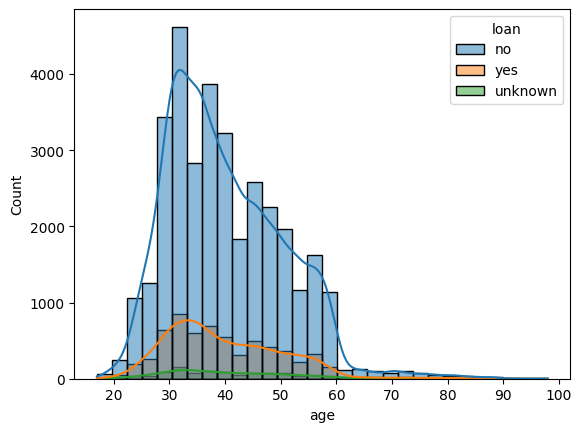

In [5]:
sns.histplot(data , x='age', bins=30 , kde=True , hue='loan')

<Axes: xlabel='pdays', ylabel='Count'>

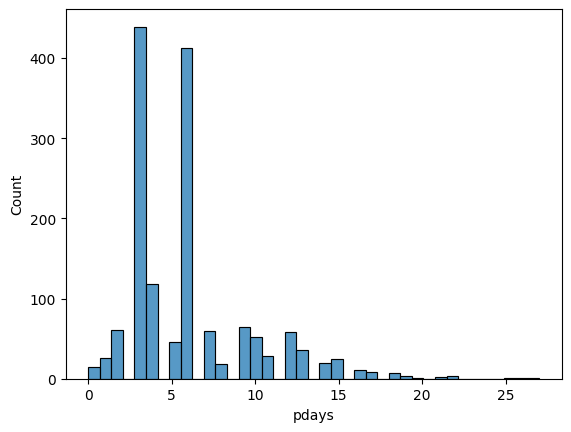

In [6]:
sns.histplot(data[data['pdays']!= 999] , x='pdays')
# most people are never been contacted before

In [7]:
data['contact'].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [8]:
data['duration'] # in seconds

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

In [9]:
cat_cols = data.select_dtypes(include='object').columns

In [10]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'subscribed'],
      dtype='object')

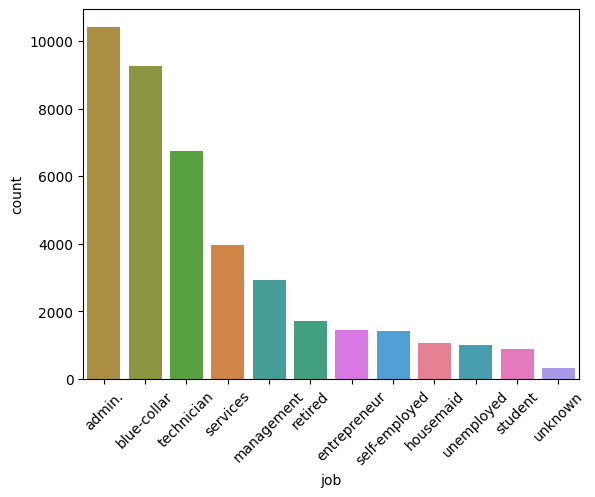

In [11]:
sns.countplot(data=data , x='job' , hue='job' , order=data['job'].value_counts().index)
plt.xticks(rotation=45);

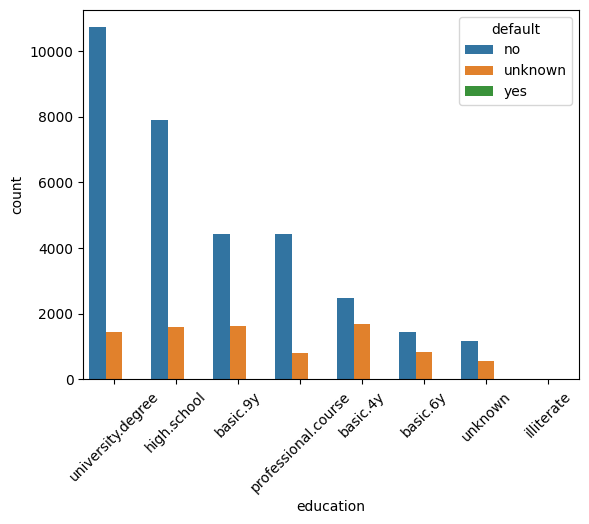

In [12]:
sns.countplot(data , x='education' , hue='default' , order=data['education'].value_counts().index)
plt.xticks(rotation=45);

<Axes: xlabel='default', ylabel='count'>

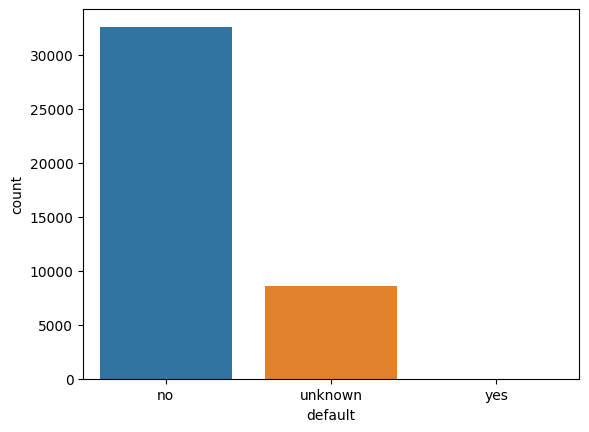

In [13]:
sns.countplot(data , x='default' , hue='default')

In [14]:
data['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

<b> Handling Categorical Columns And Scaling data

In [15]:
X = pd.get_dummies(data)
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Scaled_X = scaler.fit_transform(X)

In [17]:
from sklearn.cluster import KMeans

help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |
 |  K-Means clustering.
 |
 |  Read more in the :ref:`User Guide <k_means>`.
 |
 |  Parameters
 |  ----------
 |
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall ine

In [18]:
kmeans_model = KMeans(n_clusters=2 , random_state=42) # An arbitary choice 
#( based on data set I want to know that what people I want to market for)

# first run the KMeans and then map out the clusters as per KMeans's computation.
cluster_labels = kmeans_model.fit_predict(Scaled_X)

cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
X['Cluster'] = cluster_labels

In [20]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,False,True,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,True,False,1
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,True,False,1
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,False,True,1


<Axes: >

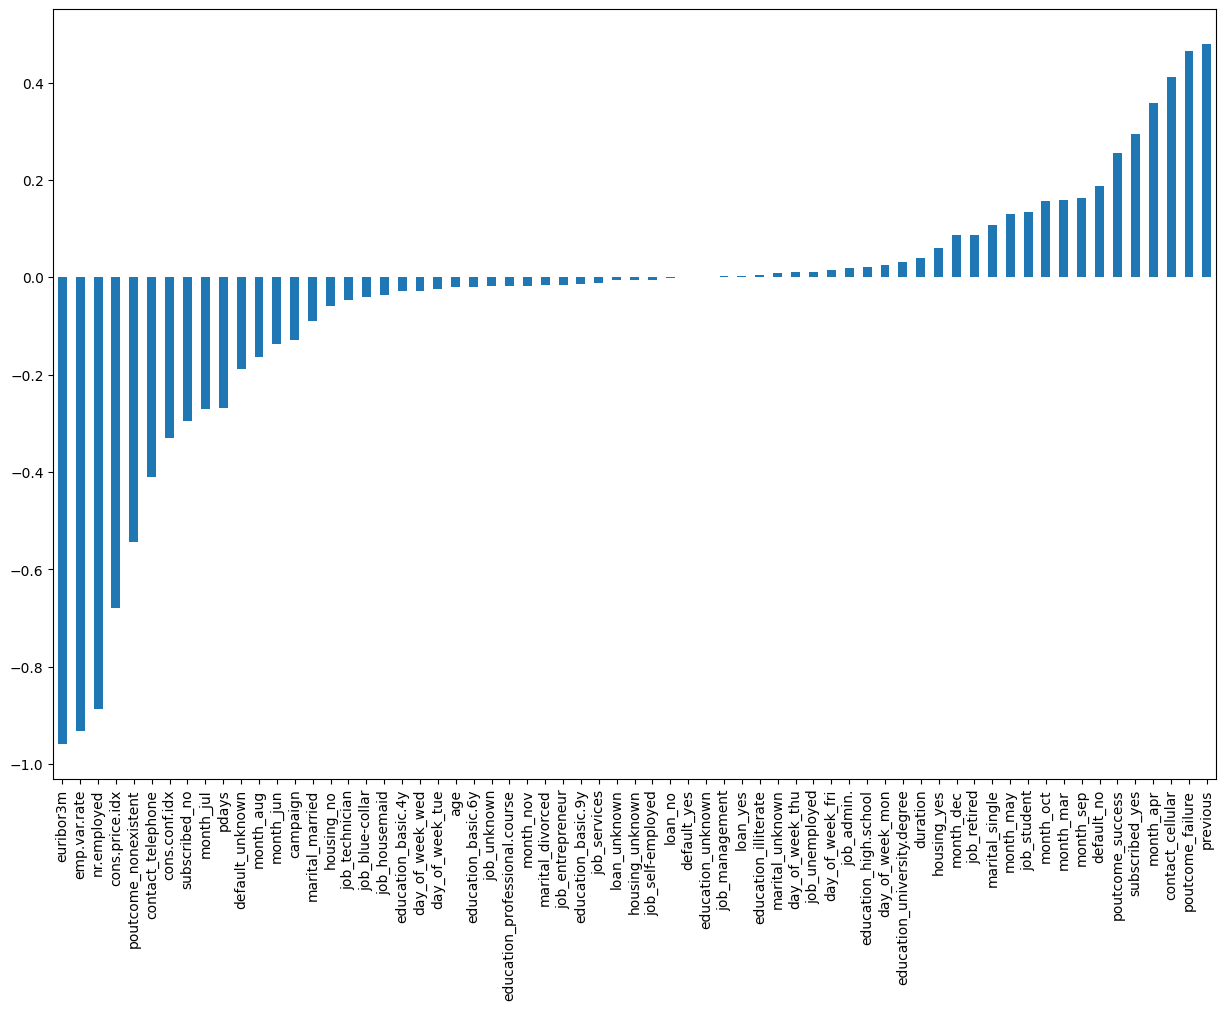

In [21]:
figure = plt.figure(figsize=(15 , 10) , dpi=100)
X.corr()['Cluster'].sort_values().iloc[:-1].plot(kind='bar')

<b> Methods of Choosing a 'k' value : how to choose optimum 'k' ? </b>

We calculate the SSD - Sum of Squared Distances for all points with cluster-point. And then we increase 'k' , again SSD.

Once we have a record of SSD for handful of 'k' values , we can see where the SSD begins to reduce , that means adding 'k' ( an cluster ) doesn't brings clarity.

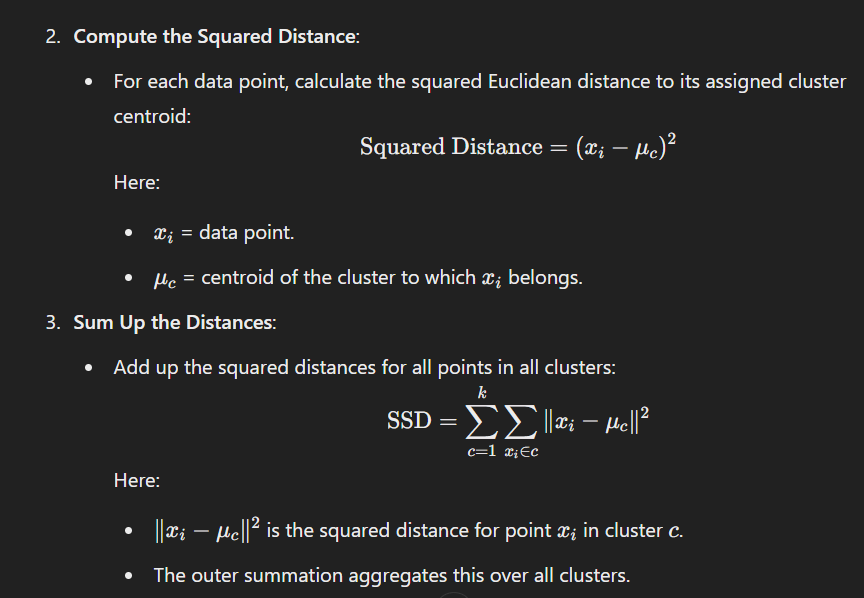


In [22]:
SSD = []

for k in range(2 , 10):

    model = KMeans(n_clusters=k)
    model.fit(Scaled_X)

    SSD.append(model.inertia_) # SSD in `sklearn.KMeans` is `.inertia_` property

In [23]:
SSD

[2469792.457107315,
 2382895.7854399187,
 2286937.2839201726,
 2296166.2669933112,
 2254372.1277612345,
 2187275.626633666,
 2140200.3270739354,
 2114221.1232150877]

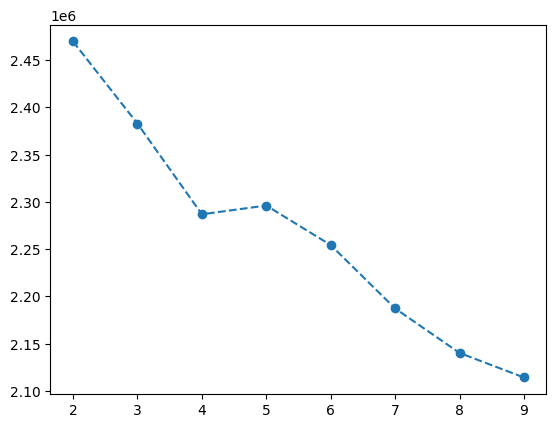

In [25]:
plt.plot(range(2 , 10) , SSD , 'o--')

In [26]:
pd.Series(SSD).diff() # calculating difference between SSD values using pandas

0             NaN
1   -86896.671667
2   -95958.501520
3     9228.983073
4   -41794.139232
5   -67096.501128
6   -47075.299560
7   -25979.203859
dtype: float64

from above differences in values we can see transition of not having benifits of increasing clusters begins at k = 3-4.